# Prediction using supervised ML

# Author : Ankit Prajapati

# Problem statement

-> Predict the percentage of a student based on the number of study hours.

-> This is a simple linear regression task.

-> What will be predicted score if a student studies for 9.25 hrs/ day?

# (1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# (2) Importing Dataset

In [2]:
df = pd.read_csv("student_scores.csv")

# (3) Exploratory Data Analysis

# (3.1) Dataset Shape

In [3]:
df.shape

(25, 2)

# (3.2) Viewing the Dataset

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# (3.3) Describing the Dataset

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# (3.4) Checking any missing values

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# (3.5) Detail information of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# (4) Data Visualization

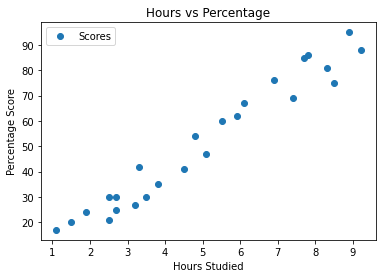

In [8]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# (5) Data Processing

In [9]:
#Division of data into attributes(input) and labels(output)
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# (6) Model Training

In [10]:
#Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

# (7) Plotting the Regression line

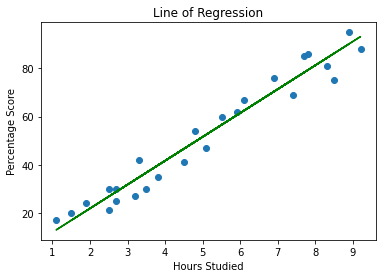

In [12]:
line = regression_model.coef_*x+regression_model.intercept_
plt.scatter(x,y)
plt.title('Line of Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x, line, c='g');
plt.show()

In [13]:
#coefficients for the prediction of each of the targets
print(regression_model.coef_)

[9.91065648]


# (8) Making Predictions

In [14]:
y_pred_train = regression_model.predict(x_train)
y_pred_test = regression_model.predict(x_test)
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# (9) Comparision of Actual and Predicted Model result

In [15]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_test})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#Estimating training and test score
regression_model.score(x_train, y_train)

0.9515510725211552

In [17]:
regression_model.score(x_test, y_test)

0.9454906892105356

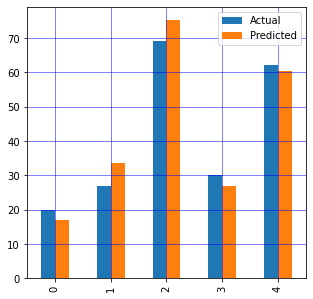

In [18]:
df.plot(kind = 'bar', figsize = (5,5))
plt.grid(which = 'major', linewidth = '0.5', color = 'blue')
plt.grid(which = 'minor', linewidth = '0.5', color = 'red')
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2, interaction_only = True)
y_pred_train = poly.fit_transform(x_train)
y_pred_test = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(y_pred_train, y_train)
y_pred = poly_clf.predict(y_pred_test)
print(poly_clf.score(y_pred_train, y_train))


print(poly_clf.score(y_pred_test, y_test))


print(x_train.shape)
print(y_pred_train.shape)

0.9515510725211553
0.9454906892105356
(20, 1)
(20, 2)


# (10) Predicting with user input data

In [22]:
hours = [[float(input())]]
own_pred = regression_model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score (Percentage) = {}".format(min(own_pred[0],100)))

9.25
No of Hours = 9.25
Predicted Score (Percentage) = 93.69173248737538


# (11) Model Evaluation

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217378
Root Mean Squared Error: 4.647447612100364
R-2: 0.9454906892105356


# THANK YOU :)